<a href="https://colab.research.google.com/github/masa512/ece558/blob/main/set2_prob7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import scipy.linalg
import math
import matplotlib.pyplot as plt

## Part a

In [2]:
def linear_conv_matrix(h,input_size):
  # Performs 1D Conv over vector (takes adv of toeplitz)
  """
  Inputs: 

  h : (L,) Unit pulse response
  input_size : (int) Size of the input vector
  """

  # Evaluate output length 

  output_length = h.shape[0] + input_size - 1

  # Pad h by zeros 

  col = np.pad(h,(0,output_length - h.shape[0]),constant_values=(0,0))

  # Make row

  row = np.pad(np.array([h[0]]),(0,input_size - 1),constant_values=(0,0))

  # Generate toeplitz matrix

  C = scipy.linalg.toeplitz(col,row)

  return C


[[1 0 0 0 0 0]
 [1 1 0 0 0 0]
 [1 1 1 0 0 0]
 [0 1 1 1 0 0]
 [0 0 1 1 1 0]
 [0 0 0 1 1 1]
 [0 0 0 0 1 1]
 [0 0 0 0 0 1]]


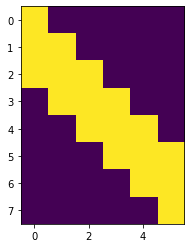

In [6]:
# Example 1 
h = np.array([1,1,1])
input_size = 6
h = linear_conv_matrix(h,input_size)
print(h)
plt.imshow(h)


[[1 0 0 0 0 0 0 0 0 0]
 [2 1 0 0 0 0 0 0 0 0]
 [3 2 1 0 0 0 0 0 0 0]
 [4 3 2 1 0 0 0 0 0 0]
 [0 4 3 2 1 0 0 0 0 0]
 [0 0 4 3 2 1 0 0 0 0]
 [0 0 0 4 3 2 1 0 0 0]
 [0 0 0 0 4 3 2 1 0 0]
 [0 0 0 0 0 4 3 2 1 0]
 [0 0 0 0 0 0 4 3 2 1]
 [0 0 0 0 0 0 0 4 3 2]
 [0 0 0 0 0 0 0 0 4 3]
 [0 0 0 0 0 0 0 0 0 4]]


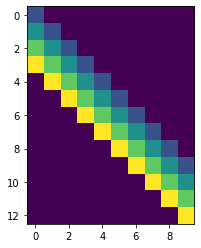

In [7]:
# Example 2
h = np.array([1,2,3,4])
input_size = 10

h = linear_conv_matrix(h,input_size)
print(h)
plt.imshow(h)

## Part b

In [ ]:
def cconv(x,h,N):
  # Pad either one to match the other

  hpad = np.pad(h,(0,N-h.shape[0]),constant_values=(0,0))
  xpad = np.pad(x,(0,N-x.shape[0]),constant_values=(0,0))

  # Perform FFT on both x and h

  X = np.fft.fft(xpad)
  H = np.fft.fft(hpad)

  Y = X*H

  # IFFT
  y = np.fft.ifft(Y)

  return np.real(y)

In [ ]:
# Example 1 
h = np.array([1,2])
x = np.array([1,2,3,4])

print('My implementation',cconv(x,h,N=h.shape[0]+x.shape[0]-1))
print('Real circular conv', np.convolve(h,x))

My implementation [ 1.  4.  7. 10.  8.]
Real circular conv [ 1  4  7 10  8]


In [ ]:
#Example 2
h = np.array([1,2,3])
x = np.array([1,1])

print('My implementation',cconv(x,h,N = h.shape[0]+x.shape[0]-1))
print('Real circular conv', np.convolve(h,x))


My implementation [1. 3. 5. 3.]
Real circular conv [1 3 5 3]


## Part c

We can decompose vector x into weighted orthogonal unit vectors
since convolution is a linear, the result of conv(x,v) is equal to weighted sum of conv(basis[i],h).

In [ ]:
def cconv_mtx(h,N):

  basis_vectors = np.diag(np.ones(N))

  C = np.array([cconv(basis_vectors[i],h,N) for i in range(N)])

  return C



# Testing the fnx
h = np.array([1,1,1])
N = 6

np.round(cconv_mtx(h,N)).astype(int)



array([[1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1],
       [1, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 1]])

## Part d

F be the DFT matrix 

In [ ]:
def DFT_mtx(N):

  return np.array([[math.e**(1j*2*np.pi/N*n*k) for n in range(N)] for k in range(N)])

In [ ]:
DFT_mtx(4)

array([[ 1.0000000e+00+0.0000000e+00j,  1.0000000e+00+0.0000000e+00j,
         1.0000000e+00+0.0000000e+00j,  1.0000000e+00+0.0000000e+00j],
       [ 1.0000000e+00+0.0000000e+00j,  6.1232340e-17+1.0000000e+00j,
        -1.0000000e+00+1.2246468e-16j, -1.8369702e-16-1.0000000e+00j],
       [ 1.0000000e+00+0.0000000e+00j, -1.0000000e+00+1.2246468e-16j,
         1.0000000e+00-2.4492936e-16j, -1.0000000e+00+3.6739404e-16j],
       [ 1.0000000e+00+0.0000000e+00j, -1.8369702e-16-1.0000000e+00j,
        -1.0000000e+00+3.6739404e-16j,  5.5109106e-16+1.0000000e+00j]])

In [ ]:
# Verification of DFT method and cconv method
h = np.array([1,2,3])
x = np.array([1,1,1])

N = h.shape[0]+x.shape[0]-1
F = DFT_mtx(N)



# DFT Method 
x_pad = np.pad(x,(0,N-x.shape[0]),constant_values=(0,0))
h_pad = np.pad(h,(0,N-h.shape[0]),constant_values=(0,0))

y_dft = np.linalg.inv(F) @ ((F @ x_pad)*(F @ h_pad))


# CCONV Method

y_cconv = cconv(x,h,N)

print('DFT:',np.real(y_dft))
print('cconv',y_cconv)


DFT: [1. 3. 6. 5. 3.]
cconv [1. 3. 6. 5. 3.]
